Data:Data：https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data; Tutorial:https://www.bilibili.com/video/BV1iJ41127cw?p=3

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('housing.csv')
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [3]:
X = df.drop(['MEDV'],axis=1)
y = df['MEDV']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred_class=model.predict(X_test)

In [25]:
y_pred_class

array([32.37816533, 27.95684437, 18.07213891, 21.63166556, 18.93029508,
       19.96277202, 32.2834674 , 18.06715668, 24.72989076, 26.85359369,
       27.23326816, 28.57021239, 21.18778302, 26.94393815, 23.37892579,
       20.89176865, 17.11746934, 37.73997945, 30.51980066,  8.44489436,
       20.86557977, 16.21989418, 25.13605925, 24.77658813, 31.40497629,
       11.02741407, 13.82097563, 16.80208261, 35.94637198, 14.7155729 ,
       21.23939821, 14.15079469, 42.72492585, 17.83887162, 21.84610225,
       20.40178099, 17.50287927, 27.00093206,  9.80760408, 20.00288662,
       24.27066782, 21.06719021, 29.47089776, 16.48482565, 19.38852695,
       14.54778282, 39.39838319, 18.09810655, 26.22164983, 20.60676525,
       25.09994066, 24.48366723, 25.02297948, 26.84986898,  5.01517985,
       24.12809513, 10.72843392, 26.83178157, 16.8023533 , 35.48142073,
       19.50937911, 27.43260347, 16.58016763, 19.151488  , 10.9990262 ,
       32.05016535, 36.32672849, 21.8596379 , 24.8158357 , 25.32

### Mean Absolute Error 平均绝对误差
- 计算预测值与真实值之间的绝对值之差

### Mean Squared Error 均方误差
- 计算MSE之前必须去掉所有缺失值
![](https://econbrowser.com/wp-content/uploads/2019/07/msemae.png)

In [26]:
#MAE
metrics.mean_absolute_error(y_test,y_pred_class)

3.57486812612756

In [27]:
#MSE
metrics.mean_squared_error(y_test,y_pred_class)

21.897765396049593

### RMSE 均方根误差
- RMSE是MSE的平方根，通常比MAE大。其量纲与原始数据量纲相同。
- RMSE便于求导，因此通常作为回归模型的评估指标
![](https://www.edc.uri.edu/nrs/classes/NRS409509/Lectures/4MapBasics/RMSE.png)

In [28]:
from math import sqrt
print(sqrt(metrics.mean_squared_error(y_test,y_pred_class)))
# 最常用

4.679504823808775


### Root Mean Squared Logarithmic Error 均方根对数误差
- 惩罚欠预测大于过预测，适用于某些需要欠预测损失更大的场景，如共享单车需求
- 在RMSE相同的情况下，预测值比真实值小这种情况的RMSLE比较大，即对于预测值小这种情况惩罚较大
- 如果预测的值范围很大，RMSE会被一些大的值主导，导致一个大值的预测错误显著增大RMSE。Log可以稍微解决该问题，减少这种值对与整体误差的判断。RMSE一般对于固定的平均分布的预测值才合理
![](https://channabasavagola.github.io/img/RMSLE.jpeg)

In [29]:
metrics.mean_squared_log_error(y_test,y_pred_class)

0.04258244728194352

### R-squared R平方（可决系数）
- 在分类问题中，我们经常将随机分类器作为基准模型，随机分类器的准确率是0.5
- 在回归问题中，我们将输出平均值的回归器作为基准模型
- 将一个回归模型的MSE初一基准模型的MSE，就可以计算R平方了
- 如果一个回归模型与基准模型一样差，那么R平方是0
- 如果一个回归模型完全预测正确，那么R平方是1
- 如果一个回归模型比基准模型还差，那么R平方是负数
![](https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG)

In [30]:
metrics.r2_score(y_test,y_pred_class)

0.7789410172622848

### Adjusted R-squared 修正R平方
- 在其他变量不变的情况下，引入新变量，总能提高模型准确度，但却是以增加模型复杂度未代价，因此引入修正R平方，相当于给特征的个数加入惩罚项。如无必要，勿增实体。R平方相同时，室友变量个数少的模型更优。
![](https://www.graphpad.com/guides/prism/7/curve-fitting/images/reg_adjustedr2equation.png)

- RMSE的大小仅仅反映模型预测值与真实值的偏差，不能反映模型真正的好坏，也许一个胡诌的预测值，RSME很小，但瞎猫碰上死耗子不能说明什么
- 但如果一个模型的修正R平方极小，那必定不是一个好模型
- RMSE的好处在于便于微分求导，也便于比较不同模型的偏差，所以各类数据科学竞赛都经常把RMSE作为默认的评估指标。

### 【Linear Regression】

In [43]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=625)

In [44]:
print(X_train.shape,y_train.shape)

(379, 13) (379,)


In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_train1,y_train1)

LinearRegression()

In [46]:
lin_reg.score(X_test1,y_test1)

0.7736159871194279

In [47]:
lin_reg.coef_

array([-1.25954343e-01,  4.29717981e-02,  1.23548901e-02,  2.65560050e+00,
       -1.93611072e+01,  3.68156335e+00,  1.62019401e-02, -1.42184268e+00,
        3.31427216e-01, -1.14970819e-02, -9.56674552e-01,  8.35209944e-03,
       -6.01463418e-01])

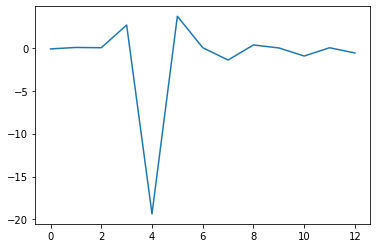

In [48]:
plt.plot(lin_reg.coef_)

In [49]:
# 预测房价
lin_reg.predict(X_test1)

array([21.78387668, 13.11587181, 15.76784376, 30.700321  , 24.90848738,
       17.16842598, 24.77115135, 25.46462965, 22.82812558, 14.61916445,
       30.75526711, 36.7337976 , 31.02112006, 31.31021847, 25.13025321,
       23.71878622, 17.75857924, 12.13994381, 15.7715072 , 23.75806379,
       21.20701838, 20.21888504,  2.40441355, 10.74788677, 15.56713935,
       33.84779947, 20.30182716, 22.942973  , 19.78675877, 21.74606745,
       16.91650203, 19.92067306, 31.96379771, 27.50248316, 25.97453076,
       11.76442005, 27.69921011, 19.75616258, 18.89548074, 23.39763054,
       34.52007251, 20.95398146, 27.01185934, 33.92213247, 17.45947165,
       -5.7739956 , 28.54304163, 24.89121179, 15.26852603, 21.40889997,
       24.2131153 , 19.77328977, 12.72041204, 16.05913256, 20.95899498,
       35.13962801, 16.86556001, 30.36371001, 27.82832479, 27.98266667,
       13.38279751,  7.2232173 , 13.21683437, 34.36870202, 20.41019515,
       29.20131202, -0.53732815, 42.29592977, 20.46739114, 36.23

In [51]:
#真实房价
y_test1

45     19.3
435    13.4
18     20.2
305    28.4
56     24.7
       ... 
245    18.5
382    11.3
398     5.0
35     18.9
277    33.1
Name: MEDV, Length: 102, dtype: float64

In [52]:
deviation = lin_reg.predict(X_test) - y_test
deviation

307    4.694404
343    3.928325
47     1.256634
67    -1.036052
362   -1.801106
         ...   
41     0.945957
361   -0.661242
289    1.750089
498   -0.161022
293    1.497074
Name: MEDV, Length: 127, dtype: float64

In [54]:
RMSE = np.sum(np.sqrt(deviation*deviation))/len(y_test)
RMSE

3.3791730572999277

In [55]:
result= {'prediction':lin_reg.predict(X_test1)}

In [56]:
result_file=pd.DataFrame(result)
result_file.head()

,prediction
0,21.783877
1,13.115872
2,15.767844
3,30.700321
4,24.908487


In [57]:
result_file.to_csv('Boston_simpleLR.csv')